# **Statistics lecture 1 Hands-on session : solutions notebook**

This is the companion notebook to lecture 1 in the statistical course series, covering the following topics:
1. numpy/scipy/matplotlib basics
2. Quantiles of the normal distribution
3. Generating data
4. The Poisson distribution
5. Histograms and chi2

## 1. Basics

These notebooks will make use of the numpy/scipy/matplotlib stack. It's also possible to implement these examples with other tools such as `root`, for those who are more familiar with it and have it installed. We'll go with numpy/scipy/matplotlib which has the advantage of being more widely available, and easy to run in tools such as `binder`, but feel free to use other implementations if you like

To start with, we need to import the relevant python packages:

In [1]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt

numpy handles most of the underlying work. In particular operations will usually be performed on numpy arrays -- arrays of floats similar to python lists.
For instance we can generate some events as follows:

In [2]:
y = np.random.normal(3.0, 1.0, 10) # generate 10 events from a Gaussian(mean=3, sigma=1) distribution
print(y)

[4.75586846 3.8402543  2.15756539 5.00314018 4.5046355  3.62392893
 2.06312448 3.2134179  2.43443313 3.46942216]


The `scipy` package has some useful features like fully-featured PDF implementations, and `matplotlib` will be used for inline plots. As an example of how things work, we can draw a few Gaussian curves: 

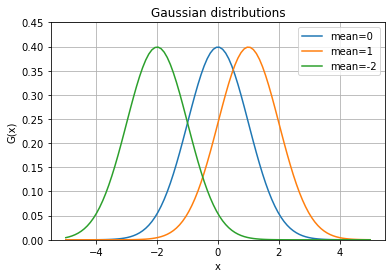

In [3]:
x = np.linspace(-5,5,100) # an array of 100 points between -5 and 5 which will be used for plotting
means = [0.0, 1.0, -2.0]   # a few mean values to plot

# Now draw the plots. Note that plt.plot takes 2 arrays, one array of x values and an array of y values.
# norm.pdf is a scalar function, which normally applies to a single x value and returns the value of
# the normal PDF at x. However it can be applied to lists as well, and will return the list of PDF values:
# norm.pdf([x1, x2]) = [norm.pdf(x1), norm.pdf(x2)]
for mean in means:
    plt.plot(x, scipy.stats.norm.pdf(x,loc=mean), label='mean=%g' % mean) # draw the plots

plt.ylim(0,0.45)   # adjust the y range
plt.grid(True)     # draw grid lines on the plot
plt.xlabel('x')
plt.ylabel('G(x)')
plt.title('Gaussian distributions')
plt.legend()

Now repeat with different widths :

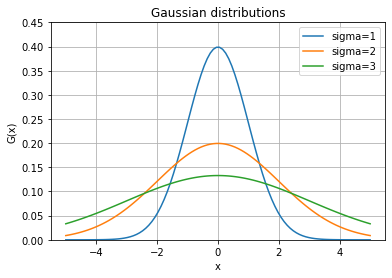

In [4]:
sigmas = [1.0, 2.0, 3.0]   # a few sigma values to plot
for sigma in sigmas:
    plt.plot(x, scipy.stats.norm.pdf(x,scale=sigma), label='sigma=%g' % sigma)
plt.ylim(0,0.45)   # adjust the y range
plt.grid(True)     # draw grid lines on the plot
plt.xlabel('x')
plt.ylabel('G(x)')
plt.title('Gaussian distributions')
plt.legend()

One can also generate random datasets and plot the result:

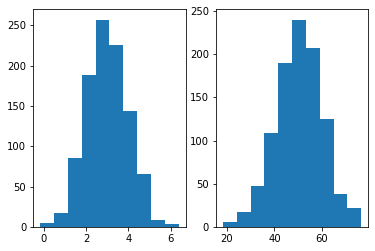

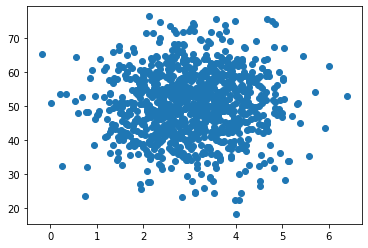

In [5]:
# generate two random variables
x = np.random.normal(3.0, 1.0, 1000)
y = np.random.normal(50.0, 10.0, 1000)

plt.subplot(121)
plt.hist(x)
plt.subplot(122)
plt.hist(y)
plt.figure(2)
plt.scatter(x,y)

Now compute some sample means, variances and covariances:

In [6]:
mean_x = np.sum(x)/1000
mean_y = np.sum(y)/1000
print('sample means:', mean_x, mean_y)
var_x = np.sum((x - mean_x)**2)/999
var_y = np.sum((y - mean_y)**2)/999
print('sample variances:', var_x, var_y)
print('sample RMSs:', np.sqrt(var_x), np.sqrt(var_y))
cov_xy = np.sum((x - mean_x)*(y - mean_y))/999
cor_xy = cov_xy/np.sqrt(var_x*var_y)
print('sample covariance and correlation coefficient:', cov_xy, cor_xy)


sample means: 3.0008794479860463 50.3568535530507
sample variances: 0.9522642476901999 94.87626333558026
sample RMSs: 0.9758402777556375 9.740444719599832
sample covariance and correlation coefficient: 0.42124997200023434 0.04431822514595485


This can also be done more simply using numpy internal functions:

In [7]:
print('sample means:', np.mean(x), np.mean(y))
print('sample variances:', np.var(x, ddof=1), np.var(y, ddof=1))
print('sample covariance and correlation coefficient:', np.cov(x, y, ddof=1)[0,1], np.corrcoef(x,y)[0,1])


sample means: 3.0008794479860463 50.3568535530507
sample variances: 0.9522642476901999 94.87626333558026
sample covariance and correlation coefficient: 0.42124997200023434 0.04431822514595486


Note that the covariance and correlations coefficient should really be zero, the non-zero value here is due to fluctuations. For a case with real correlation, one can do

sample covariance and correlation coefficient of (x, 5x+y): 5.1825712104512345 0.47906978328676486


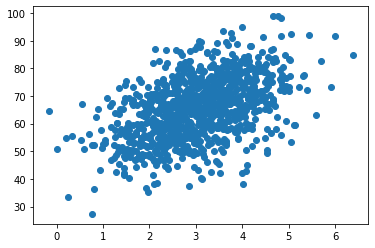

In [8]:
z = 5*x +y
plt.scatter(x,z)
print('sample covariance and correlation coefficient of (x, 5x+y):', np.cov(x, z, ddof=1)[0,1], np.corrcoef(x,z)[0,1])

## 2. Gaussian quantiles

The *quantiles* of a PDF are the fraction of its integral within a given range of its variable. The quantiles of the normal distribution $N(x) = G(x; x_0=0,\sigma=1)$ play an important role since they are used to define some important quantities later ($1\sigma$ and $1\sigma$ errors, $5\sigma$ discovery, etc.). 

One defines the cumulative distribution function of normal as $\Phi(x) = \int\limits_{-\infty}^x N(t) dt$, and a two-sided version can also be defined as $\Phi(x, y) = \int\limits_x^y N(t) dt$

They are easy to compute using the scipy tools:

Text(-4.5, 0.45, 'Phi(1)=0.841345')

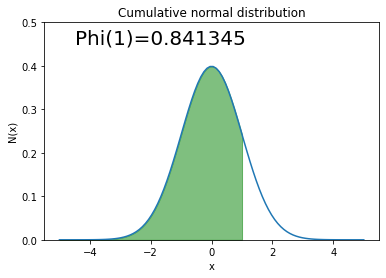

In [9]:
# Draw a normal distribution as before
x = np.linspace(-5,5,100)
fig = plt.figure()
plt.plot(x, scipy.stats.norm.pdf(x))
plt.ylim(0,0.5)
plt.title("Cumulative normal distribution")
plt.xlabel('x')
plt.ylabel('N(x)')

# Now fill in part of the distribution and print the integral
up = 1
shaded_x = np.linspace(-5,up,100)
plt.fill_between(shaded_x, scipy.stats.norm.pdf(shaded_x), alpha=0.5, color='g')
plt.text(-4.5, 0.45, 'Phi(%g)=%g' % (up, scipy.stats.norm.cdf(up)), fontsize=20)

This form is normally referred to as a *one-sided* quantile. Two-sided quantiles apply the boundary on both sides:

Text(-4.5, 0.45, 'Phi(-1, 1)=0.682689')

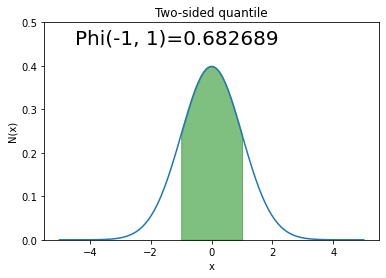

In [10]:
# Draw a normal distribution as before
fig = plt.figure()
plt.plot(x, scipy.stats.norm.pdf(x))
plt.ylim(0,0.5)
plt.title("Two-sided quantile")
plt.xlabel('x')
plt.ylabel('N(x)')

up = 1
shaded_x = np.linspace(-up,up,100)
plt.fill_between(shaded_x, scipy.stats.norm.pdf(shaded_x), alpha=0.5, color='g')
plt.text(-4.5, 0.45, 'Phi(-%g, %g)=%g' % (up, up, scipy.stats.norm.cdf(up) - scipy.stats.norm.cdf(-up)), fontsize=20)

Now let's plot some quantiles for different values of the bounds. As we'll see, the tail integrals (a.k.a the *survival function*, corresponding to the unshaded areas above) are also useful, so compute all of the following:

In [11]:
bounds = [0, 1, 2, 3, 4, 5]
one_sided = [ scipy.stats.norm.cdf(up) for up in bounds ]
one_sided_tail = [ scipy.stats.norm.sf(up) for up in bounds ]
two_sided = [ scipy.stats.norm.cdf(up) - scipy.stats.norm.cdf(-up) for up in bounds ]
two_sided_tail = [ scipy.stats.norm.sf(up) + scipy.stats.norm.cdf(-up) for up in bounds ]


# Pretty-print the result
import pandas as pd
import jinja2
data = np.array([ bounds, one_sided, one_sided_tail, two_sided, two_sided_tail ]).T
labels = [ 'Bound', '1-sided', '1-tail', '2-sided', '2-tail' ]
pd.DataFrame(data, columns=labels)

,Bound,1-sided,1-tail,2-sided,2-tail
0,0.0,0.500000,5.000000e-01,0.000000,1.000000e+00
1,1.0,0.841345,1.586553e-01,0.682689,3.173105e-01
2,2.0,0.977250,2.275013e-02,0.954500,4.550026e-02
3,3.0,0.998650,1.349898e-03,0.997300,2.699796e-03
4,4.0,0.999968,3.167124e-05,0.999937,6.334248e-05
5,5.0,1.000000,2.866516e-07,0.999999,5.733031e-07


## 3. Poisson distributions and the Central-limit theorem

First let's get acquainted with Poisson distributions. As explained in the lecture, they are critical to describe counting processes, and become progressively more Gaussian with increasing event rates, so we can check a few rate hypotheses:

,Rate,Mean,Variance
0,0.1,0.1,0.1
1,1.0,1.0,1.0
2,3.0,3.0,3.0
3,10.0,10.0,10.0


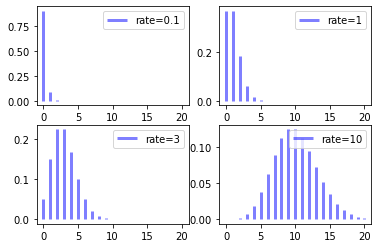

In [12]:
x = np.linspace(0, 20, 21)
rates = [ 0.1, 1, 3, 10 ]

for i, rate in enumerate(rates) :
  plt.subplot(221 + i)
  plt.vlines(x, 0, scipy.stats.poisson.pmf(x, rate), colors='b', lw=3, alpha=0.5, label='rate=%g' % rate)
  plt.legend()

data = np.array([ rates, [  scipy.stats.poisson.stats(mu=rate, moments='m') for rate in rates ], [  scipy.stats.poisson.stats(mu=rate, moments='v')  for rate in rates  ] ]).T
labels = [ 'Rate', 'Mean', 'Variance' ]
pd.DataFrame(data, columns=labels)

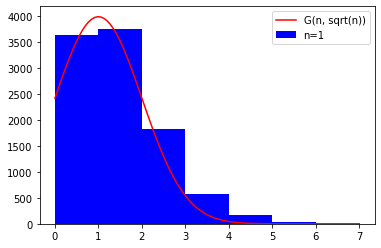

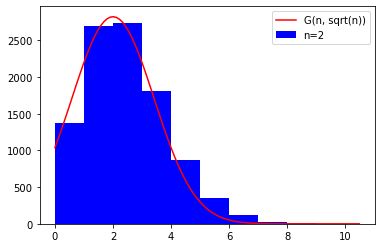

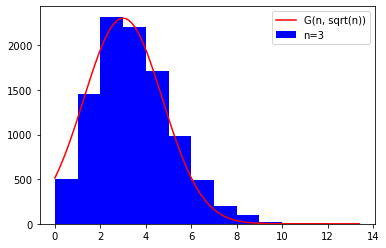

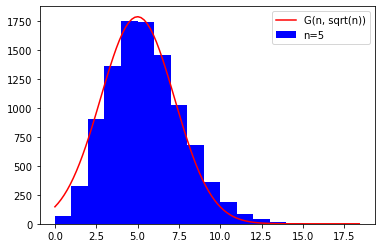

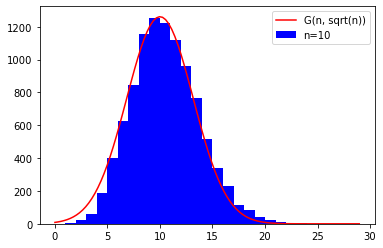

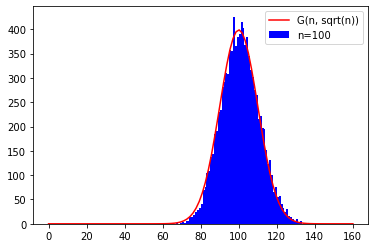

In [13]:
nexp = 10000
nsums = [ 1, 2, 3, 5, 10, 100 ]
for nsum in nsums :
  plt.figure()
  data = [ sum([ np.random.poisson(1) for i in range(0, nsum) ]) for k in range(0, nexp) ]
  range_max =  nsum + 6*np.sqrt(nsum)
  plt.hist(data, bins=np.arange(0, range_max, 1), color='b', label='n=%d' % nsum)
  x = np.linspace(0, range_max, 100)
  plt.plot(x, nexp*scipy.stats.norm.pdf(x, loc=nsum, scale=np.sqrt(nsum)), color='r', label='G(n, sqrt(n))' )
  plt.legend()

As expected, the distribution becomes more Gaussian as we increase the number of terms, with a variance that grows as $\sqrt n$.

## 4. Histograms and the $\chi^2$ test


We consider a 20-bin histogram of data over $[0,1]$, which we assume is coming from a linear distribution, $f(x) \propto (1 - x/2)$. We also assume that we have a histogram of data, and would like to decide whether the data is compatible with the assumed linear distribution. 

chi2: 15.174932792803276
p(chi2): 0.7663119081306642
chi2, p(chi2), significance from scipy: 15.17493279280328 0.7663119081306639 -0.7267547885691412


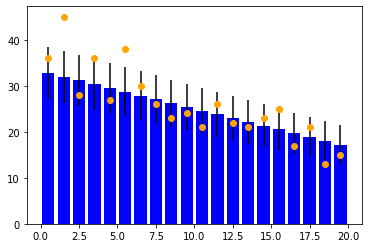

In [52]:
nbins = 20
nevts = 1000
x = np.linspace(0.5, nbins - 0.5, nbins)
expected_yields = np.array([ (1 - i/2/nbins) for i in range(0, nbins) ])
expected_yields *= nevts/np.sum(expected_yields)
dataset = [ np.random.poisson(y) for y in expected_yields ]
plt.figure()
plt.bar(x, expected_yields, yerr=np.sqrt(expected_yields), color='b')
plt.scatter(x, dataset, color='orange', zorder=10)
chi2 = sum( [ ((d-y)/np.sqrt(y))**2 for d,y in zip(dataset, expected_yields) ])
chi2_scipy = scipy.stats.chisquare(dataset, expected_yields, ddof=-1)
print('chi2:', chi2)
print('p(chi2):', scipy.stats.chi2.sf(chi2, 20))
print('chi2, p(chi2), significance from scipy:', chi2_scipy.statistic, chi2_scipy.pvalue, scipy.stats.norm.isf(chi2_scipy.pvalue))


The compatibility betwee the generated dataset the true distribution may be larger or smaller depending on the random fluctuations that were generated, but generally the agreement should be quite good. If we now consider a prediction with the opposite slope, this will be generally much worse:

chi2, p(chi2), significance from scipy: 132.48672417673248 1.3294220267907227e-18 8.725126006537533


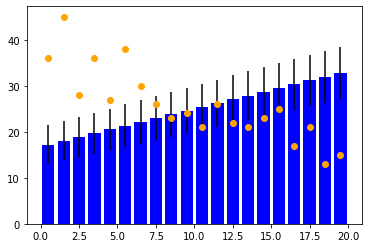

In [53]:
plt.figure()
plt.bar(x, np.flip(expected_yields), yerr=np.sqrt(np.flip(expected_yields)), color='b')
plt.scatter(x, dataset, color='orange', zorder=10)
chi2_scipy_flip = scipy.stats.chisquare(dataset, np.flip(expected_yields), ddof=-1)
print('chi2, p(chi2), significance from scipy:', chi2_scipy_flip.statistic, chi2_scipy_flip.pvalue, scipy.stats.norm.isf(chi2_scipy_flip.pvalue))

One can check that the distribution is doing what it is expected to do by generating dataset:

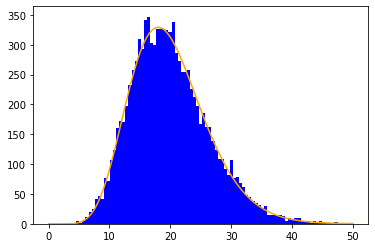

In [57]:
ndata = 10000
all_data = [ [ np.random.poisson(y) for y in expected_yields ] for i in range(0, ndata) ]
all_chi2 = [ scipy.stats.chisquare(data, expected_yields, ddof=-1).statistic for data in all_data ]
bins = np.linspace(0,50,100)
null = plt.hist(all_chi2, bins=bins, color='b')
plt.plot(bins, scipy.stats.chi2.pdf(bins, 20)*ndata/2, color='orange')

Finally, one can repeat the whole study with a lower number of events per dataset, e.g. 10 instead of 1000. In this regime, the Poisson distributions in each bin are not Gaussian enough, and the computed $\chi^2$ does not in fact follow a $\chi^2$ distribution. In this case, one needs to move away from the $\chi^2$ formula and use a statistical model than accounts for Poisson effects.

## Addendum: Correlations and correlation coefficients

In [66]:
a = np.random.uniform(-0.5,0.5,10000)
b = np.random.uniform(-0.5,0.5,10000)
u = (a+b)
v = (a-b)

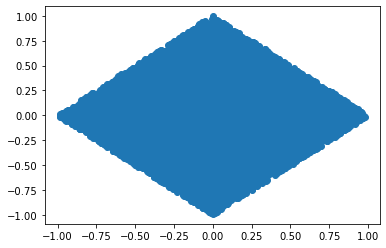

In [67]:
plt.scatter(u,v)

In [68]:
np.cov(u,v)

array([[ 0.16688353, -0.0013893 ],
       [-0.0013893 ,  0.16280034]])

In [69]:
np.corrcoef(u,v)

array([[ 1.        , -0.00842873],
       [-0.00842873,  1.        ]])

In [70]:
np.corrcoef(u,v)[0,1]

-0.008428732458245899